# Problem Statement

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and we have been asked to classify positive, negative, and neutral tweets.

Dataset has following features/variables


tweet_id
airline_sentiment
airline_sentiment_confidence
negativereason
negativereason_confidence
airline
airline_sentiment_gold
name
negativereason_gold
retweet_count
text
tweet_coord
tweet_created
tweet_location
user_timezone


In [2]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

**Load the csv file available in the working or specified directory**

In [3]:
#import os
#os.chdir('C:\\GL Class\DSBA - Python\Machine Learning\Week 4')
Airline_tweets = pd.read_csv("twitter-airline-sentiment.csv")

In [4]:
Airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
## Let's get the count of Airline
print(Airline_tweets['airline'].nunique())
print(Airline_tweets['airline'].value_counts().sort_values())

6
Virgin America     504
Delta             2222
Southwest         2420
American          2759
US Airways        2913
United            3822
Name: airline, dtype: int64


**So we have data set of 6 airlines**

In [7]:
Airline_tweets.shape ## 14640 rows and 15 variables

(14640, 15)

**Check for null values**

In [8]:
((Airline_tweets.isnull() | Airline_tweets.isna()).sum() * 100 / Airline_tweets.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

**Columns with more than 90% missing values will be deleted**

In [9]:
Airline_tweets.drop(['tweet_coord'], axis = 1,inplace=True)
Airline_tweets.drop(['airline_sentiment_gold'], axis = 1,inplace=True)
Airline_tweets.drop(['negativereason_gold'], axis = 1,inplace=True)
Airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**As the data set has data for 6 airlines, let's get a count of positive, negative and neutral for each airline**

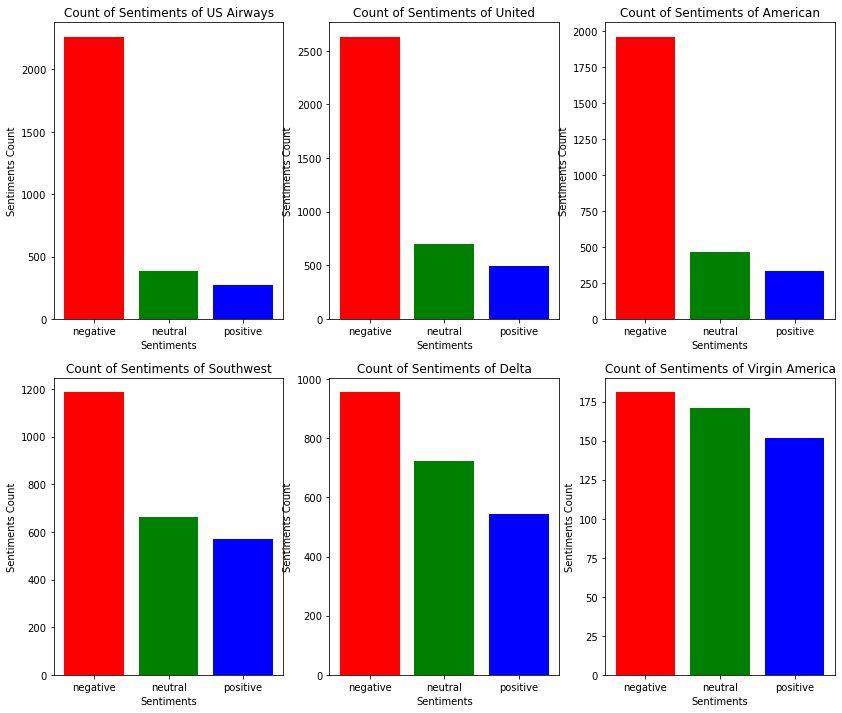

In [10]:
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(14, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=Airline_tweets[Airline_tweets['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Sentiments Count')
    plt.xlabel('Sentiments')
    plt.title('Count of Sentiments of '+i)


1. **US Airways have a least positive sentiment followed by American and United.**
2. **Virgin America has most balanced sentiments**


## Basic Exploration in Text Mining

**Number of words## To create a temporary function lambda can be used. These functions do not require a name like a def function, however the output is**
1. **same as defining a permanent function**
2. **As these function are temporary, memory consumption is less in comparison to permanent function, Also there are multiple ways to get a similar output**

**Let's get a word count without writing a lambda function**

In [11]:
Airline_tweets['totalwords'] = [len(x.split()) for x in Airline_tweets['text'].tolist()]
Airline_tweets[['text','totalwords']].head()

,text,totalwords
0,@VirginAmerica What @dhepburn said.,4
1,@VirginAmerica plus you've added commercials t...,9
2,@VirginAmerica I didn't today... Must mean I n...,12
3,@VirginAmerica it's really aggressive to blast...,17
4,@VirginAmerica and it's a really big bad thing...,10


In [12]:
Airline_tweets['word_count'] = Airline_tweets['text'].apply(lambda x: len(str(x).split(" ")))
Airline_tweets[['text','word_count']].head()

,text,word_count
0,@VirginAmerica What @dhepburn said.,4
1,@VirginAmerica plus you've added commercials t...,9
2,@VirginAmerica I didn't today... Must mean I n...,12
3,@VirginAmerica it's really aggressive to blast...,17
4,@VirginAmerica and it's a really big bad thing...,10


**Number of Characters- including spaces**

In [13]:
Airline_tweets['char_count'] = Airline_tweets['text'].str.len() ## this also includes spaces
Airline_tweets[['text','char_count']].head()

,text,char_count
0,@VirginAmerica What @dhepburn said.,35
1,@VirginAmerica plus you've added commercials t...,72
2,@VirginAmerica I didn't today... Must mean I n...,71
3,@VirginAmerica it's really aggressive to blast...,126
4,@VirginAmerica and it's a really big bad thing...,55


**Average Word Length:**

In [14]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

Airline_tweets['avg_word'] = Airline_tweets['text'].apply(lambda x: avg_word(x))
Airline_tweets[['text','avg_word']].head()

,text,avg_word
0,@VirginAmerica What @dhepburn said.,8.000000
1,@VirginAmerica plus you've added commercials t...,7.111111
2,@VirginAmerica I didn't today... Must mean I n...,5.000000
3,@VirginAmerica it's really aggressive to blast...,6.470588
4,@VirginAmerica and it's a really big bad thing...,4.600000


In [15]:
###!pip install nltk

In [16]:
### import nltk
###nltk.download('stopwords')

**Number of stop Words:**

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

Airline_tweets['stopwords'] = Airline_tweets['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
Airline_tweets[['text','stopwords']].head()

,text,stopwords
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,3
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,6
4,@VirginAmerica and it's a really big bad thing...,5


**Number of special character:**

In [18]:
Airline_tweets['hastags'] = Airline_tweets['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
Airline_tweets[['text','hastags']].head()

,text,hastags
0,@VirginAmerica What @dhepburn said.,2
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,1
4,@VirginAmerica and it's a really big bad thing...,1


**Number of numerics:**

In [19]:
Airline_tweets['numerics'] = Airline_tweets['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
Airline_tweets[['text','numerics']].head()

,text,numerics
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,0
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


**Number of Uppercase Words:**

In [20]:
Airline_tweets['upper'] = Airline_tweets['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
Airline_tweets[['text','upper']].head()

,text,upper
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,0
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


In [21]:
##!pip install wordcloud

**Let's get an idea of most frequently used words in negative tweets:**

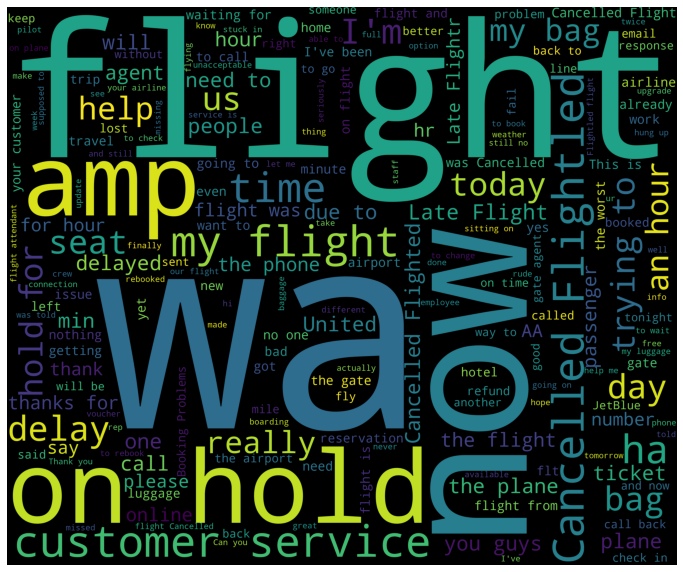

In [22]:
from wordcloud import WordCloud,STOPWORDS
new_df=Airline_tweets[Airline_tweets['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


1. **In the above word cloud there are certain words probably will not make too much sense to study the reason for negative sentiment and subsequently based on the frequency of these words we will decide if the same needs to be deleted**
2. **Lets understand the reason for negativity for each airline:**

In [42]:
cleaned_word

'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it\'s been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be able 2 eat anything for next 6 hrs #fail amazing to me that we can\'t get any cold air from the vents. #VX358 #noair #worstflightever #roasted

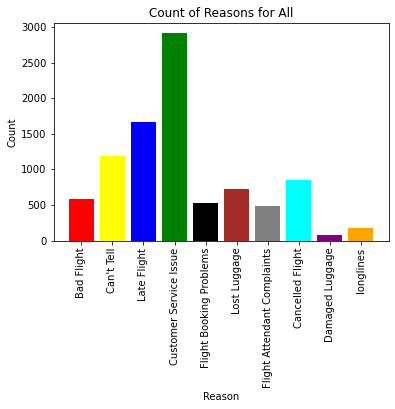

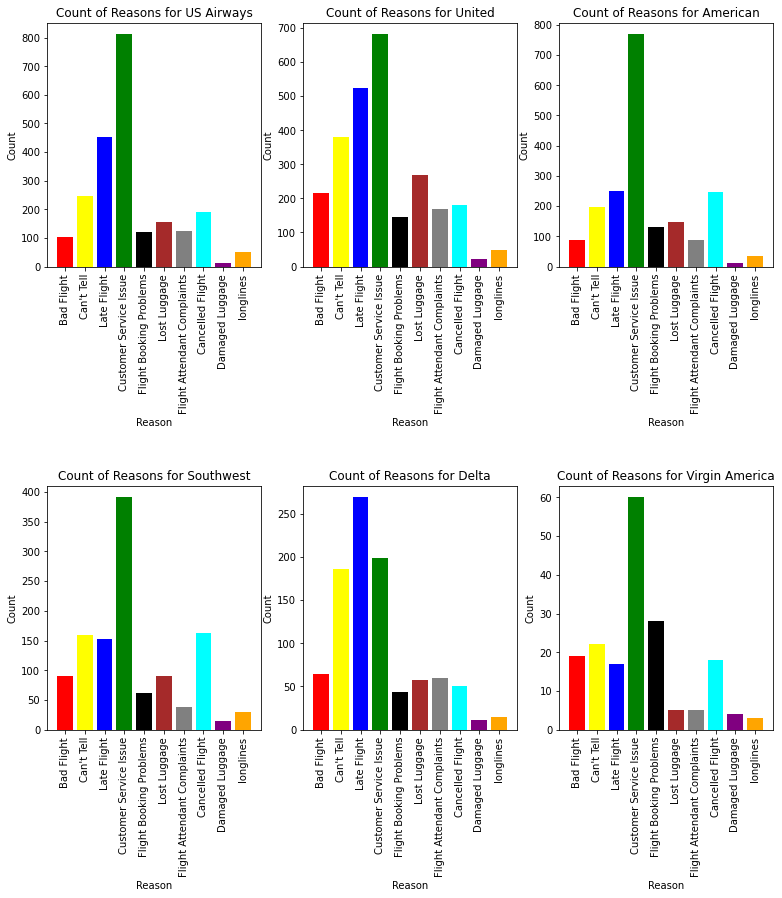

In [23]:
Airline_tweets['negativereason'].nunique()

NR_Count=dict(Airline_tweets['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=Airline_tweets
    else:
        a=Airline_tweets[Airline_tweets['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(Airline_tweets['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

1. **Customer Service Issue is the main negative reason for US Airways,United,American,Southwest,Virgin America**
2. **Late Flight is the main negative reason for Delta.**
3. **Interestingly, Virgin America has the least count of negative reasons (all less than 60)**
4. **Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)**

Readers are advised to perform the similar analysis for Positive and Neutral tweets as well.

## Basic Pre-Processing

**Lower Case conversion:**

In [24]:
Airline_tweets['Tweet'] = Airline_tweets['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Airline_tweets['Tweet'].head()

0                  @virginamerica what @dhepburn said.
1    @virginamerica plus you've added commercials t...
2    @virginamerica i didn't today... must mean i n...
3    @virginamerica it's really aggressive to blast...
4    @virginamerica and it's a really big bad thing...
Name: Tweet, dtype: object

**Removal of Punctuation:**

In [25]:
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].str.replace('[^\w\s]','')
Airline_tweets['Tweet'].head()

0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: Tweet, dtype: object

**Removal of StopWords**

In [26]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Airline_tweets['Tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus youve added commercials exp...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

**Common Words Removal**
1. **We will create a list of 10 frequently occurring words and then decide if we need to remove it or retain it**
2. **Reason is that this file has tweets related to flights.. So no point in keeping the words like name, unless we have tweets related to different category**
3. **Name of the specific airline is not removed as we would require the name of the airline for bigram analysis**

In [27]:
freq = pd.Series(' '.join(Airline_tweets['Tweet']).split()).value_counts()[:30]
freq

united           4143
flight           3873
usairways        3051
americanair      2957
southwestair     2452
jetblue          2361
get              1334
thanks           1072
cancelled        1056
service           956
help              855
time              770
im                764
customer          746
us                679
hours             669
flights           646
2                 644
amp               638
hold              637
plane             618
thank             602
cant              578
still             568
please            560
one               558
need              553
would             548
delayed           529
virginamerica     521
dtype: int64

**Please note that we are removing the digit 2 here. This 2 might mean "to" in English. However as advanced library package of NLP are not used, this would get treated as a digit and hence we are removing the same:**

In [28]:
freq =['flight','2']

In [29]:

Airline_tweets['Tweet'] = Airline_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Airline_tweets['Tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus youve added commercials exp...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

**Rare Words Removal**
**>This is done as association of these less occurring words with the existing words could be a noise**
> **As it is difficult to make out if these words will have association in text analytics or not, hence to start with these words are kept in the dataset**

In [43]:
freq = pd.Series(' '.join(Airline_tweets['Tweet']).split()).value_counts()[-10:]
freq

httptcozzps5ywve2     1
flightedsnow          1
heels                 1
cathaypacificus       1
154                   1
httptco9nivw9ftzw     1
flintstone            1
bosmco                1
httpstcokaej9g0chd    1
responseservice       1
dtype: int64

**Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach**

In [44]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
Airline_tweets['Tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))



0                          virginamerica dhepburn said
1      virginamerica plu youv ad commerci experi tacki
2    virginamerica didnt today must mean need take ...
3    virginamerica realli aggress blast obnoxi ente...
4                   virginamerica realli big bad thing
Name: Tweet, dtype: object

**Let's look at the overall distribution of positive, negative and neutral sentiments**

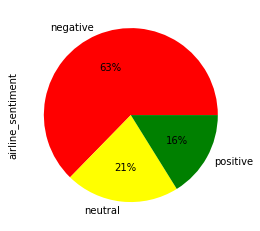

In [45]:
Airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red","yellow","green"])

In [46]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
 12  totalwords                    14640 non-null  int64  
 13  w

In [47]:
processed_features = Airline_tweets.iloc[:, 20].values
labels = Airline_tweets.iloc[:, 1].values

In [48]:
processed_features

array(['virginamerica dhepburn said',
       'virginamerica plus youve added commercials experience tacky',
       'virginamerica didnt today must mean need take another trip', ...,
       'americanair please bring american airlines blackberry10',
       'americanair money change dont answer phones suggestions make commitment',
       'americanair 8 ppl need know many seats next plz put us standby 4 people next'],
      dtype=object)

In [49]:
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [51]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [53]:
y_train

array(['positive', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

## Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=200, random_state=0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [55]:
## Performance Matrix on train data set
from sklearn import metrics
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9925717213114754
[[7279   27    2]
 [   4 2451   30]
 [   5   19 1895]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      7308
     neutral       0.98      0.99      0.98      2485
    positive       0.98      0.99      0.99      1919

    accuracy                           0.99     11712
   macro avg       0.99      0.99      0.99     11712
weighted avg       0.99      0.99      0.99     11712



In [56]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.757172131147541
[[1722  108   40]
 [ 318  251   45]
 [ 131   69  244]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.59      0.41      0.48       614
    positive       0.74      0.55      0.63       444

    accuracy                           0.76      2928
   macro avg       0.71      0.63      0.66      2928
weighted avg       0.74      0.76      0.74      2928



## Decision Tree Model

In [57]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier(random_state=1)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [58]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9925717213114754
[[7282   26    0]
 [   6 2452   27]
 [   7   21 1891]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      7308
     neutral       0.98      0.99      0.98      2485
    positive       0.99      0.99      0.99      1919

    accuracy                           0.99     11712
   macro avg       0.99      0.99      0.99     11712
weighted avg       0.99      0.99      0.99     11712



In [59]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6673497267759563
[[1445  300  125]
 [ 277  272   65]
 [ 117   90  237]]
              precision    recall  f1-score   support

    negative       0.79      0.77      0.78      1870
     neutral       0.41      0.44      0.43       614
    positive       0.56      0.53      0.54       444

    accuracy                           0.67      2928
   macro avg       0.58      0.58      0.58      2928
weighted avg       0.67      0.67      0.67      2928



## Discriminant Analysis

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [61]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8734631147540983
[[6846  360  102]
 [ 490 1860  135]
 [ 216  179 1524]]
              precision    recall  f1-score   support

    negative       0.91      0.94      0.92      7308
     neutral       0.78      0.75      0.76      2485
    positive       0.87      0.79      0.83      1919

    accuracy                           0.87     11712
   macro avg       0.85      0.83      0.84     11712
weighted avg       0.87      0.87      0.87     11712



In [62]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7581967213114754
[[1604  209   57]
 [ 215  342   57]
 [ 100   70  274]]
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      1870
     neutral       0.55      0.56      0.55       614
    positive       0.71      0.62      0.66       444

    accuracy                           0.76      2928
   macro avg       0.70      0.68      0.69      2928
weighted avg       0.76      0.76      0.76      2928



**Out of the 3 models given above, considering the different between train and test dataset performance parameters, LDA has performed the best.**

## Let's Recreate model with only 2 classes where positive and neutral tweets are merged and treated as non-negative


In [63]:
def Tweet(x):
    if x == "positive":
        return "Non-Negative"
    elif x == 'neutral':
        return "Non-Negative"
    else: return "Negative"


In [64]:
Airline_tweets["M-Sentiment"] = Airline_tweets["airline_sentiment"].apply(Tweet)

Airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,...,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,Tweet,M-Sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,...,4,4,35,8.000000,0,2,0,0,virginamerica dhepburn said,Non-Negative
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,...,9,9,72,7.111111,3,1,0,0,virginamerica plus youve added commercials exp...,Non-Negative
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,...,12,12,71,5.000000,2,1,0,2,virginamerica didnt today must mean need take ...,Non-Negative
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,...,17,17,126,6.470588,6,1,0,0,virginamerica really aggressive blast obnoxiou...,Negative
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,...,10,10,55,4.600000,5,1,0,0,virginamerica really big bad thing,Negative


**Recheck the levels of the newly created field**

In [65]:
Airline_tweets["M-Sentiment"].value_counts()

Negative        9178
Non-Negative    5462
Name: M-Sentiment, dtype: int64

In [66]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
 12  totalwords                    14640 non-null  int64  
 13  w

In [67]:
processed_features = Airline_tweets.iloc[:, 20].values
labels = Airline_tweets.iloc[:, 21].values

In [68]:
processed_features

array(['virginamerica dhepburn said',
       'virginamerica plus youve added commercials experience tacky',
       'virginamerica didnt today must mean need take another trip', ...,
       'americanair please bring american airlines blackberry10',
       'americanair money change dont answer phones suggestions make commitment',
       'americanair 8 ppl need know many seats next plz put us standby 4 people next'],
      dtype=object)

In [69]:
labels

array(['Non-Negative', 'Non-Negative', 'Non-Negative', ...,
       'Non-Negative', 'Negative', 'Non-Negative'], dtype=object)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [71]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [73]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
y_train

array(['Non-Negative', 'Negative', 'Negative', ..., 'Negative',
       'Negative', 'Negative'], dtype=object)

## Random Forest Model as Binary Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=200, random_state=0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [76]:
## Performance Matrix on train data set
from sklearn import metrics
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9967554644808743
[[7279   29]
 [   9 4395]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      7308
Non-Negative       0.99      1.00      1.00      4404

    accuracy                           1.00     11712
   macro avg       1.00      1.00      1.00     11712
weighted avg       1.00      1.00      1.00     11712



In [77]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7995218579234973
[[1643  227]
 [ 360  698]]
              precision    recall  f1-score   support

    Negative       0.82      0.88      0.85      1870
Non-Negative       0.75      0.66      0.70      1058

    accuracy                           0.80      2928
   macro avg       0.79      0.77      0.78      2928
weighted avg       0.80      0.80      0.80      2928



**Results are better than 3 levels random forest classification, however difference between train and test score is still large.
Let's see if hyperparamter tuning can improve the result**

**Grid Search for finding the optimal number of parameters:**

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7],
    'max_features': [8],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [79]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7], 'max_features': [8],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100]})

In [80]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [81]:
best_grid = grid_search.best_estimator_

In [82]:
best_grid

RandomForestClassifier(max_depth=7, max_features=8, min_samples_leaf=5,
                       min_samples_split=50)

In [83]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9967554644808743
[[7279   29]
 [   9 4395]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      7308
Non-Negative       0.99      1.00      1.00      4404

    accuracy                           1.00     11712
   macro avg       1.00      1.00      1.00     11712
weighted avg       1.00      1.00      1.00     11712



In [84]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7995218579234973
[[1643  227]
 [ 360  698]]
              precision    recall  f1-score   support

    Negative       0.82      0.88      0.85      1870
Non-Negative       0.75      0.66      0.70      1058

    accuracy                           0.80      2928
   macro avg       0.79      0.77      0.78      2928
weighted avg       0.80      0.80      0.80      2928



No improvement in the result

## Decision Tree with Binary classification

In [85]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier( random_state=1)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [86]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9967554644808743
[[7281   27]
 [  11 4393]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      7308
Non-Negative       0.99      1.00      1.00      4404

    accuracy                           1.00     11712
   macro avg       1.00      1.00      1.00     11712
weighted avg       1.00      1.00      1.00     11712



In [87]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7137978142076503
[[1387  483]
 [ 355  703]]
              precision    recall  f1-score   support

    Negative       0.80      0.74      0.77      1870
Non-Negative       0.59      0.66      0.63      1058

    accuracy                           0.71      2928
   macro avg       0.69      0.70      0.70      2928
weighted avg       0.72      0.71      0.72      2928



**Random Forest results were better than the output from decision tree on the test data set**

**Let's regularize the tree to find out if this will perform better:**

In [88]:
reg_DT_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 8,min_samples_leaf=10,min_samples_split=30)
reg_DT_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=30)

In [89]:
## Performance Matrix on train data set
y_train_predict = reg_DT_model.predict(X_train)
model_score = reg_DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7482069672131147
[[6603  705]
 [2244 2160]]
              precision    recall  f1-score   support

    Negative       0.75      0.90      0.82      7308
Non-Negative       0.75      0.49      0.59      4404

    accuracy                           0.75     11712
   macro avg       0.75      0.70      0.71     11712
weighted avg       0.75      0.75      0.73     11712



In [90]:
## Performance Matrix on test data set
y_test_predict = reg_DT_model.predict(X_test)
model_score = reg_DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7288251366120219
[[1648  222]
 [ 572  486]]
              precision    recall  f1-score   support

    Negative       0.74      0.88      0.81      1870
Non-Negative       0.69      0.46      0.55      1058

    accuracy                           0.73      2928
   macro avg       0.71      0.67      0.68      2928
weighted avg       0.72      0.73      0.71      2928



**On a Regularized Tree, Non-Negative recall is not good, hence for comparison we will consider the model which was built without regularization**

## Discriminant Analysis with Binary Classifier

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [92]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8981386612021858
[[6797  511]
 [ 682 3722]]
              precision    recall  f1-score   support

    Negative       0.91      0.93      0.92      7308
Non-Negative       0.88      0.85      0.86      4404

    accuracy                           0.90     11712
   macro avg       0.89      0.89      0.89     11712
weighted avg       0.90      0.90      0.90     11712



In [93]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8032786885245902
[[1590  280]
 [ 296  762]]
              precision    recall  f1-score   support

    Negative       0.84      0.85      0.85      1870
Non-Negative       0.73      0.72      0.73      1058

    accuracy                           0.80      2928
   macro avg       0.79      0.79      0.79      2928
weighted avg       0.80      0.80      0.80      2928



1. **Linear Discriminant model has performed the best even without any hyperparameter tuning for both the classes**
2. **Test and Train performance is within the accepted limited of +/- 10%**

## Conclusion

Out of the 3 models given above, considering the difference between train and test dataset performance parameters, LDA has performed the best.(for both 3 classes and binary classification)

In terms of sentiments, based on the organisation objective, either positive, negative or neutral metrics could be analysed to define the marketing strategy e.g. based on negative sentiments key words organisation can decide on what they should concertrate for improvement.


**One important observation**

> **Its not necessary that parameter tuning will always result in a better model. As we have observed in Random Forest when Grid Search was used there was no improvement in the recall value of both the classes.and in case of Decision Tree, recall for non-negative has gone down , post regularization.**